In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

592

In [6]:
import requests
# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [8]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(url)
city_weather

<Response [400]>

In [9]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [10]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":802,"main":"Clouds","description":"scattered clouds","icon":"03d"}],"base":"stations","main":{"temp":59.81,"feels_like":59.92,"temp_min":55.45,"temp_max":65.19,"pressure":1020,"humidity":94},"visibility":10000,"wind":{"speed":4,"deg":241,"gust":5.01},"clouds":{"all":40},"dt":1625999408,"sys":{"type":2,"id":2013408,"country":"US","sunrise":1625995057,"sunset":1626049290},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [11]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 59.81,
  'feels_like': 59.92,
  'temp_min': 55.45,
  'temp_max': 65.19,
  'pressure': 1020,
  'humidity': 94},
 'visibility': 10000,
 'wind': {'speed': 4, 'deg': 241, 'gust': 5.01},
 'clouds': {'all': 40},
 'dt': 1625999408,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1625995057,
  'sunset': 1626049290},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [12]:
# Get the JSON data.
boston_data = city_weather.json()

In [13]:
boston_data["sys"]

{'type': 2,
 'id': 2013408,
 'country': 'US',
 'sunrise': 1625995057,
 'sunset': 1626049290}

In [14]:
boston_data["dt"]

1625999408

In [43]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
desp = boston_data["weather"][0]["description"]
print(lat, lng, max_temp, humidity, clouds, wind, desp)

42.3584 -71.0598 65.19 94 40 4 scattered clouds


In [16]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2021-07-11 10:30:08'

In [17]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
            # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
            # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | guerrero negro
Processing Record 2 of Set 1 | nome
Processing Record 3 of Set 1 | new norfolk
Processing Record 4 of Set 1 | imbituba
Processing Record 5 of Set 1 | provideniya
Processing Record 6 of Set 1 | leningradskiy
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 9 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | pevek
Processing Record 12 of Set 1 | talnakh
Processing Record 13 of Set 1 | cidreira
Processing Record 14 of Set 1 | marawi
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | asau
Processing Record 17 of Set 1 | kinarut
Processing Record 18 of Set 1 | college
Processing Record 19 of Set 1 | vaini
Processing Record 20 of Set 1 | kapaa
Processing Record 21 of Set 1 | sabha
Processing Record 22 of Set 1 | hobar

Processing Record 38 of Set 4 | airai
Processing Record 39 of Set 4 | hermanus
Processing Record 40 of Set 4 | maldonado
Processing Record 41 of Set 4 | saleaula
City not found. Skipping...
Processing Record 42 of Set 4 | anadyr
Processing Record 43 of Set 4 | la ronge
Processing Record 44 of Set 4 | mount gambier
Processing Record 45 of Set 4 | ancud
Processing Record 46 of Set 4 | moree
Processing Record 47 of Set 4 | whitehorse
Processing Record 48 of Set 4 | norman wells
Processing Record 49 of Set 4 | coihaique
Processing Record 50 of Set 4 | tiksi
Processing Record 1 of Set 5 | bambous virieux
Processing Record 2 of Set 5 | amderma
City not found. Skipping...
Processing Record 3 of Set 5 | tarko-sale
Processing Record 4 of Set 5 | victoria
Processing Record 5 of Set 5 | labuan
Processing Record 6 of Set 5 | skibbereen
Processing Record 7 of Set 5 | suda
Processing Record 8 of Set 5 | hualmay
Processing Record 9 of Set 5 | halalo
City not found. Skipping...
Processing Record 10 of

Processing Record 26 of Set 8 | shenjiamen
Processing Record 27 of Set 8 | campechuela
Processing Record 28 of Set 8 | marcona
City not found. Skipping...
Processing Record 29 of Set 8 | tabou
Processing Record 30 of Set 8 | camapua
Processing Record 31 of Set 8 | sedalia
Processing Record 32 of Set 8 | bollnas
Processing Record 33 of Set 8 | diamantino
Processing Record 34 of Set 8 | falealupo
City not found. Skipping...
Processing Record 35 of Set 8 | dingle
Processing Record 36 of Set 8 | suntar
Processing Record 37 of Set 8 | kamen
Processing Record 38 of Set 8 | kuche
City not found. Skipping...
Processing Record 39 of Set 8 | ostersund
Processing Record 40 of Set 8 | ikirun
Processing Record 41 of Set 8 | anshun
Processing Record 42 of Set 8 | empalme
Processing Record 43 of Set 8 | muros
Processing Record 44 of Set 8 | caborca
Processing Record 45 of Set 8 | alzamay
Processing Record 46 of Set 8 | atasu
Processing Record 47 of Set 8 | kamenskoye
City not found. Skipping...
Proce

Processing Record 9 of Set 12 | doctor pedro p. pena
City not found. Skipping...
Processing Record 10 of Set 12 | nador
Processing Record 11 of Set 12 | jinchang
Processing Record 12 of Set 12 | kyzyl-suu
Processing Record 13 of Set 12 | aykhal
Processing Record 14 of Set 12 | markova
Processing Record 15 of Set 12 | bonavista
Processing Record 16 of Set 12 | musoma
Processing Record 17 of Set 12 | channapatna
Processing Record 18 of Set 12 | havelock
Processing Record 19 of Set 12 | ostrovnoy
Processing Record 20 of Set 12 | chkalovskoye
Processing Record 21 of Set 12 | plant city
Processing Record 22 of Set 12 | mangrol
Processing Record 23 of Set 12 | teya
Processing Record 24 of Set 12 | belyy yar
Processing Record 25 of Set 12 | galle
Processing Record 26 of Set 12 | karaul
City not found. Skipping...
Processing Record 27 of Set 12 | urucara
Processing Record 28 of Set 12 | fairbanks
Processing Record 29 of Set 12 | tuscaloosa
Processing Record 30 of Set 12 | port blair
Processing

In [18]:
len(city_data)

536

In [19]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Guerrero Negro,27.9769,-114.0611,67.35,85,100,10.89,MX,2021-07-11 10:32:43
1,Nome,64.5011,-165.4064,49.15,90,96,3.36,US,2021-07-11 10:34:24
2,New Norfolk,-42.7826,147.0587,44.71,81,100,2.64,AU,2021-07-11 10:32:52
3,Imbituba,-28.2400,-48.6703,57.81,76,1,4.76,BR,2021-07-11 10:38:03
4,Provideniya,64.3833,-173.3000,53.28,81,90,2.06,RU,2021-07-11 10:33:05
5,Leningradskiy,69.3833,178.4167,39.56,89,84,9.86,RU,2021-07-11 10:33:59
6,Albany,42.6001,-73.9662,60.62,94,84,0.63,US,2021-07-11 10:30:01
7,Mataura,-46.1927,168.8643,39.85,96,99,3.22,NZ,2021-07-11 10:33:03
8,Pevek,69.7008,170.3133,43.11,75,62,6.22,RU,2021-07-11 10:32:11
9,Talnakh,69.4865,88.3972,52.72,39,59,5.06,RU,2021-07-11 10:33:11


In [20]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness","Wind Speed"]
city_data_df= city_data_df[new_column_order]

In [21]:
# Create the output file (CSV).
output_data_file = "cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [23]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1626000042.698267

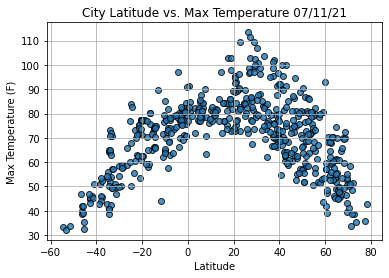

In [24]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("MaxTemp.png")

# Show plot.
plt.show()

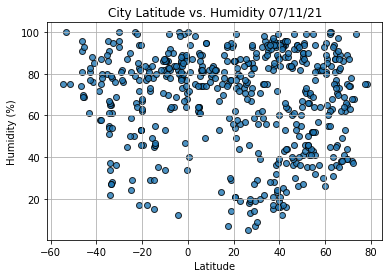

In [25]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Humidity.png")
# Show plot.
plt.show()

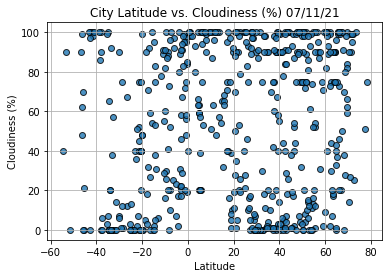

In [26]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Cloudiness.png")
# Show plot.
plt.show()

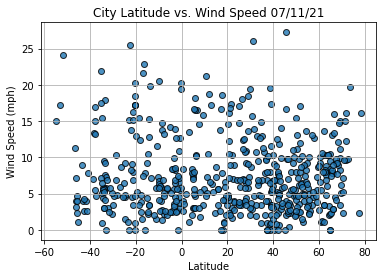

In [27]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("WindSpeed.png")
# Show plot.
plt.show()

In [28]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data. **Create Tuple**
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [29]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Guerrero Negro,MX,2021-07-11 10:32:43,27.9769,-114.0611,67.35,85,100,10.89
1,Nome,US,2021-07-11 10:34:24,64.5011,-165.4064,49.15,90,96,3.36
4,Provideniya,RU,2021-07-11 10:33:05,64.3833,-173.3000,53.28,81,90,2.06
5,Leningradskiy,RU,2021-07-11 10:33:59,69.3833,178.4167,39.56,89,84,9.86
6,Albany,US,2021-07-11 10:30:01,42.6001,-73.9662,60.62,94,84,0.63


In [30]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


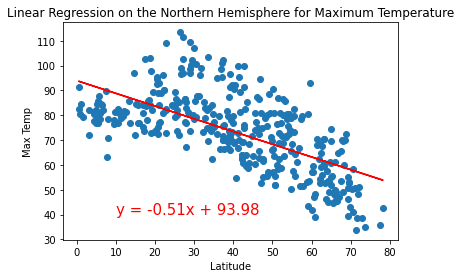

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                    'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))


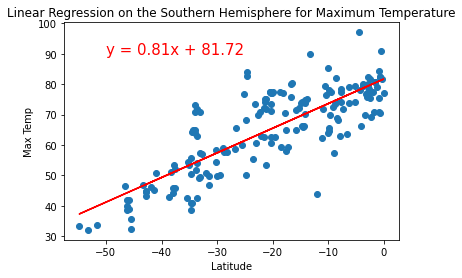

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))


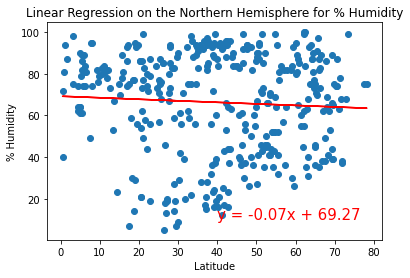

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))


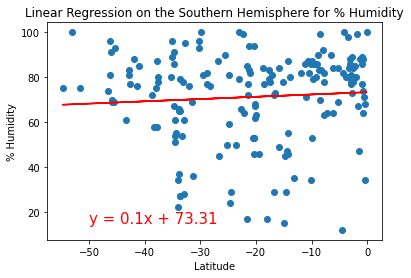

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

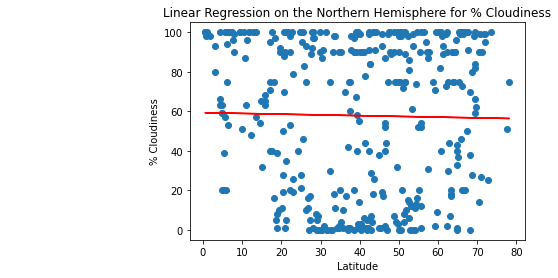

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

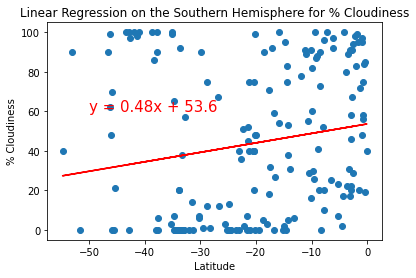

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

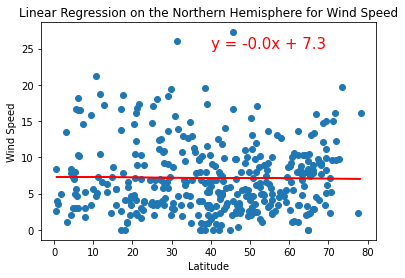

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,25))

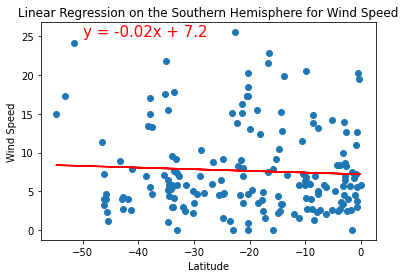

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,25))